In [1]:
data <- read.csv('Bank_ejercicio grupos.csv', sep= ';', stringsAsFactor= TRUE)
str(data)

'data.frame':	300 obs. of  9 variables:
 $ Age     : int  48 40 51 23 57 57 22 58 37 54 ...
 $ Sex     : Factor w/ 2 levels "FEMALE","MALE": 1 2 1 1 1 1 2 2 1 2 ...
 $ Region  : Factor w/ 4 levels "INNER_CITY","RURAL",..: 1 4 1 4 2 4 2 4 3 4 ...
 $ Income  : num  17546 30085 16575 20375 50576 ...
 $ Married : Factor w/ 2 levels "NO","YES": 1 2 2 2 2 2 1 2 2 2 ...
 $ Children: Factor w/ 2 levels "NO","YES": 2 2 1 2 1 2 1 1 2 2 ...
 $ car     : Factor w/ 2 levels "NO","YES": 1 2 2 1 1 1 1 2 2 2 ...
 $ Mortgage: Factor w/ 2 levels "NO","YES": 1 2 1 1 1 1 1 1 1 1 ...
 $ Pep     : Factor w/ 2 levels "NO","YES": 2 1 1 1 1 2 2 1 1 1 ...


In [2]:
summary(data)

      Age            Sex             Region        Income      Married  
 Min.   :18.00   FEMALE:146   INNER_CITY:137   Min.   : 5014   NO : 98  
 1st Qu.:30.00   MALE  :154   RURAL     : 51   1st Qu.:17263   YES:202  
 Median :43.00                SUBURBAN  : 25   Median :24925            
 Mean   :42.57                TOWN      : 87   Mean   :27656            
 3rd Qu.:54.00                                 3rd Qu.:36434            
 Max.   :67.00                                 Max.   :63130            
 Children   car      Mortgage   Pep     
 NO :129   NO :153   NO :195   NO :162  
 YES:171   YES:147   YES:105   YES:138  
                                        
                                        
                                        
                                        

In [3]:
colnames(data)

[1] "Age"      "Sex"      "Region"   "Income"   "Married"  "Children" "car"     
[8] "Mortgage" "Pep"

In [4]:
dim(data)

[1] 300   9

In [5]:
dnum <- data[, c(1,4)]
head(dnum)

Age,Income
48,17546.0
40,30085.1
51,16575.4
23,20375.4
57,50576.3
57,37869.6


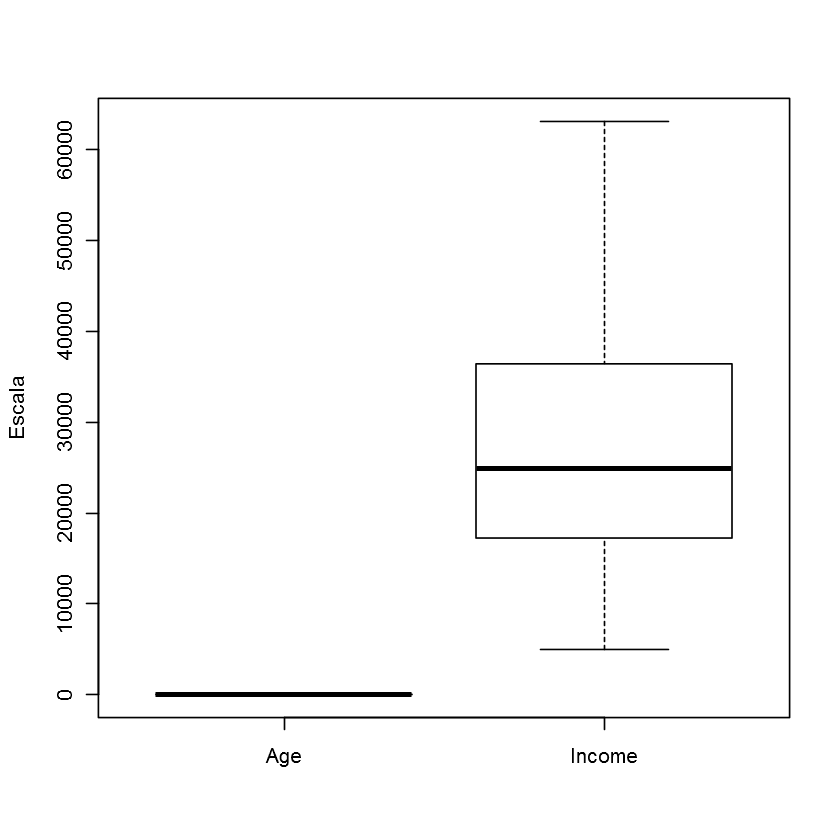

In [6]:
boxplot(dnum,
        ylab= 'Escala',
        title = 'Boxplot')

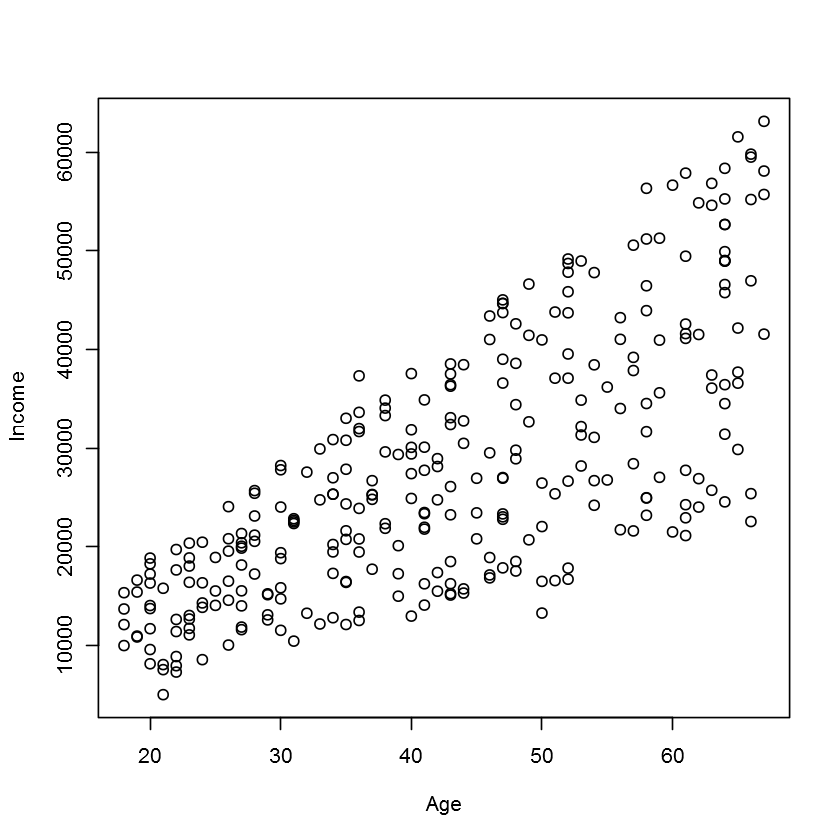

In [7]:
plot(dnum)

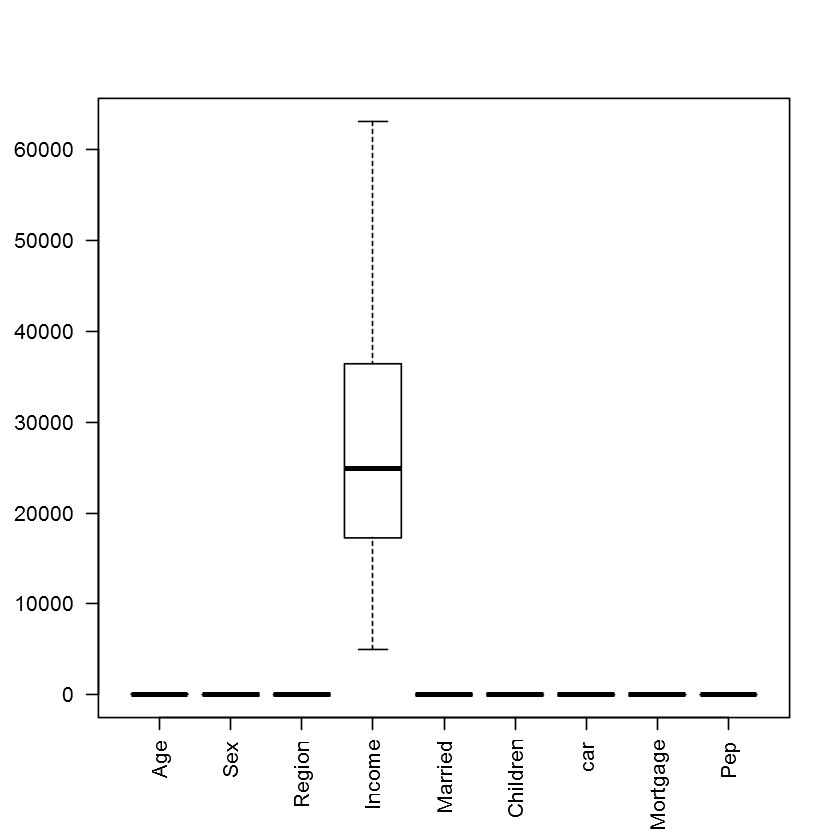

In [8]:
boxplot(data, las=2)

In [9]:
# Se define la función de normalización

MinMaxEscaler <-
function(x) {
    return ((x - min(x)) / (max(x) - min(x)))
}

# Se aplica la función a los datos

dnum <- as.data.frame(lapply(dnum, MinMaxEscaler))

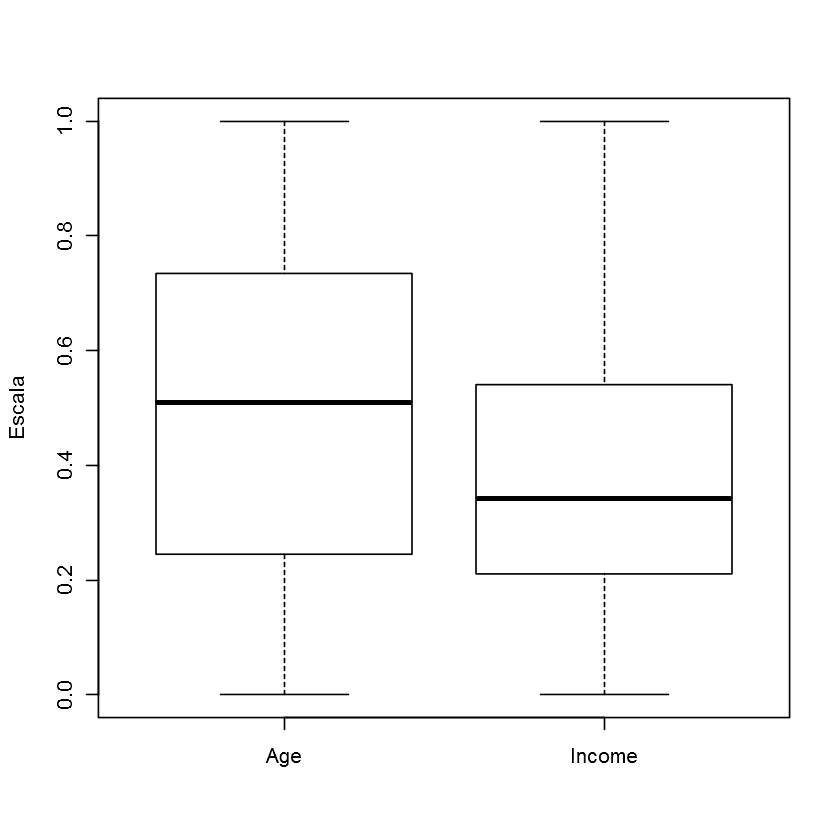

In [10]:
boxplot(dnum,
        ylab= 'Escala')

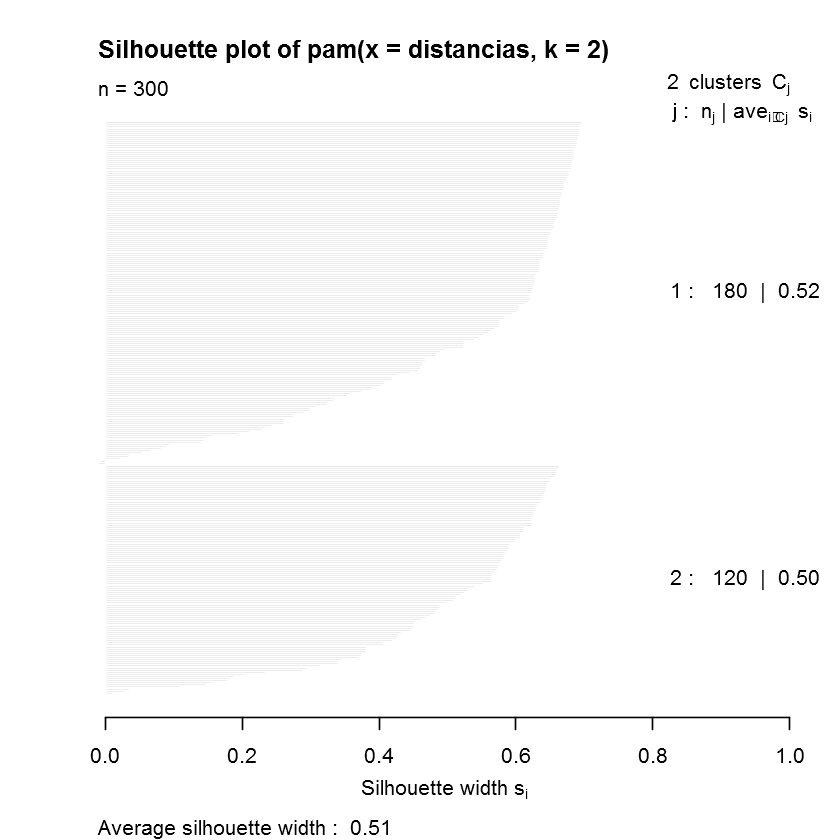

In [11]:
library(cluster)
distancias <- dist(dnum, method = "euclidian")
silueta <- pam(distancias, 2)
plot(silueta)

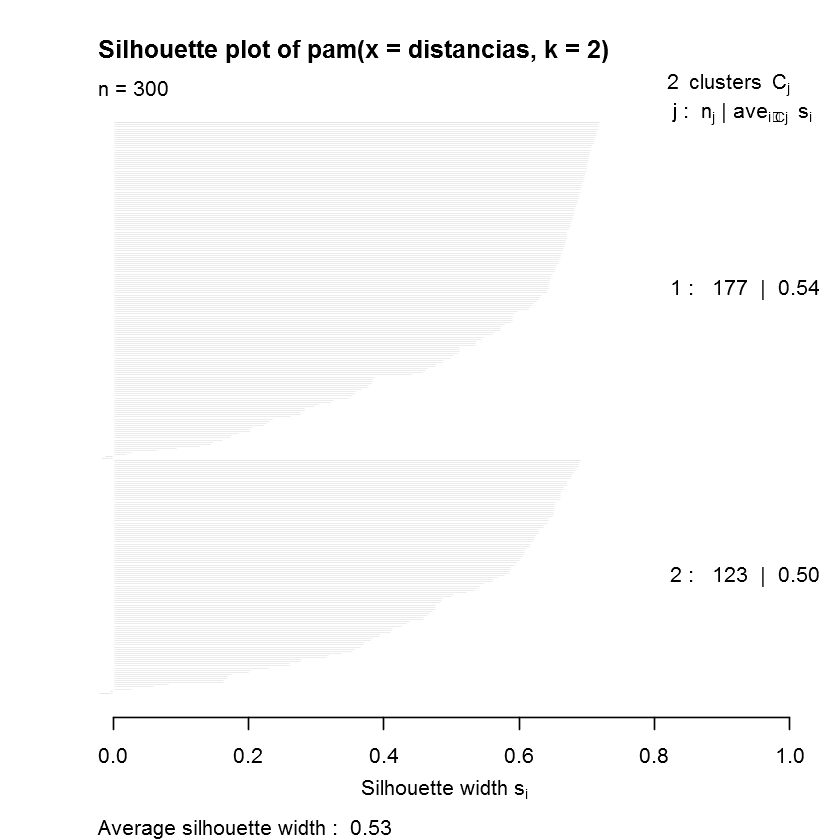

In [12]:
library(cluster)
distancias <- dist(dnum, method = "manhattan")
silueta <- pam(distancias, 2)
plot(silueta)

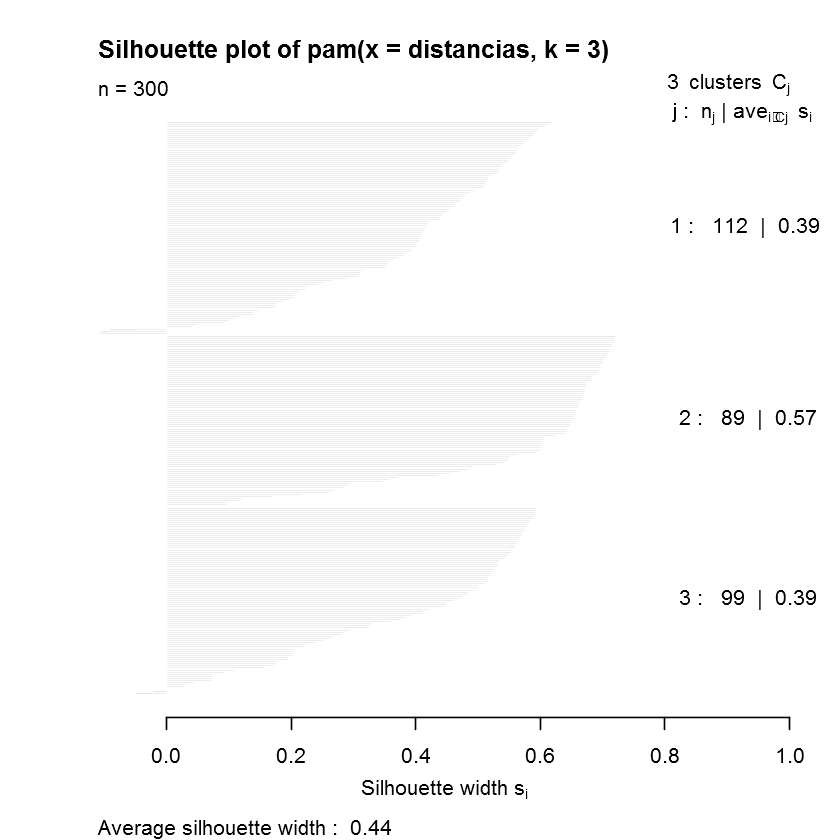

In [13]:
library(cluster)
distancias <- dist(dnum, method = "euclidian")
silueta <- pam(distancias, 3)
plot(silueta)

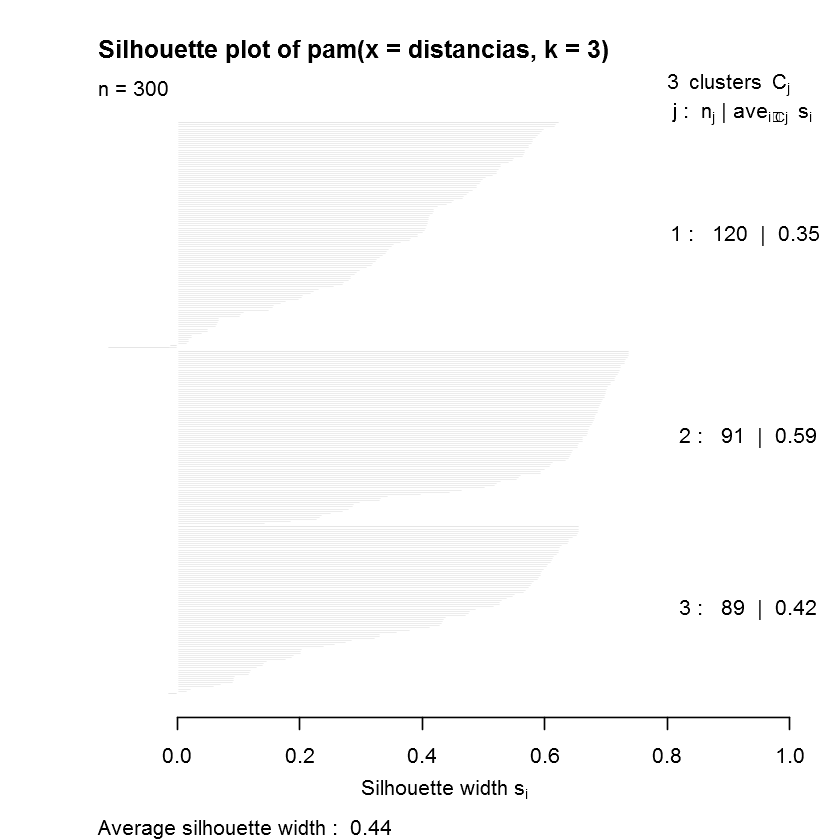

In [14]:
library(cluster)
distancias <- dist(dnum, method = "manhattan")
silueta <- pam(distancias, 3)
plot(silueta)

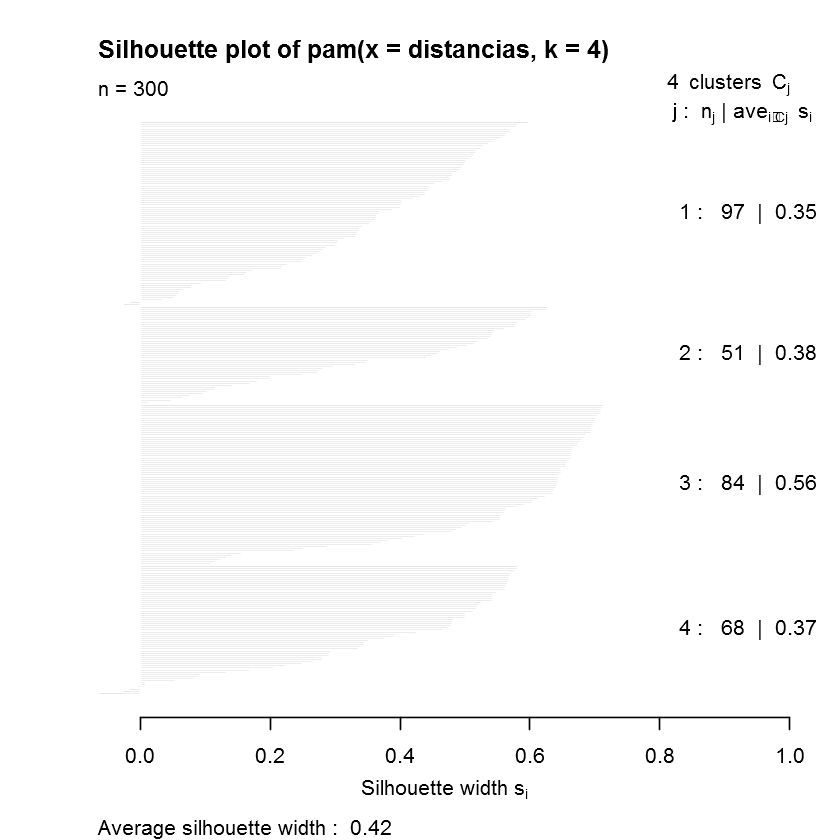

In [15]:
library(cluster)
distancias <- dist(dnum, method = "euclidian")
silueta <- pam(distancias, 4)
plot(silueta)

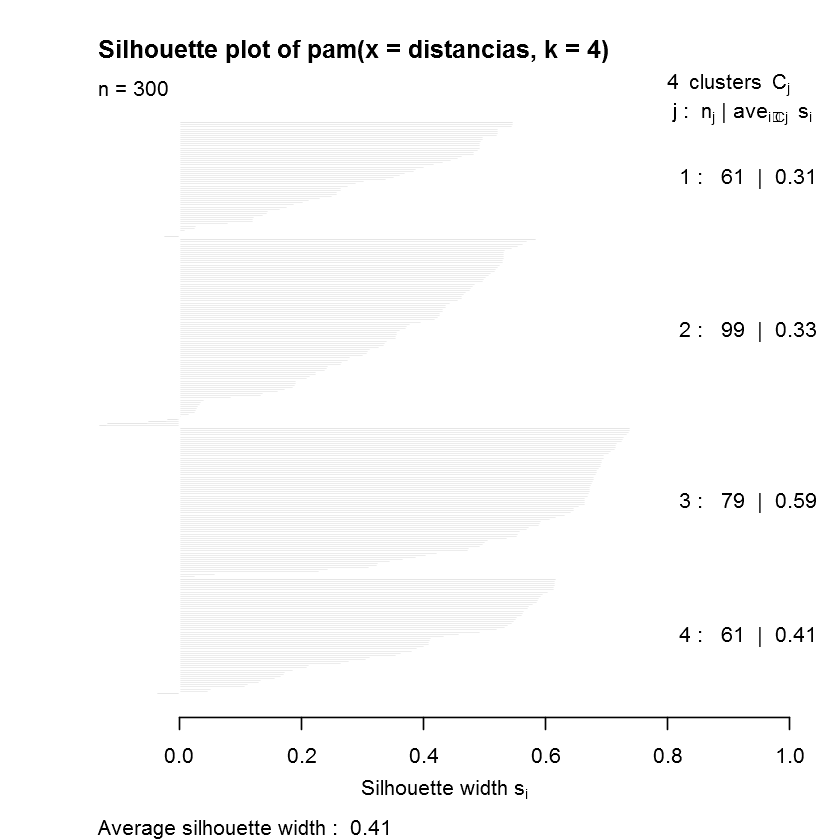

In [16]:
library(cluster)
distancias <- dist(dnum, method = "manhattan")
silueta <- pam(distancias, 4)
plot(silueta)

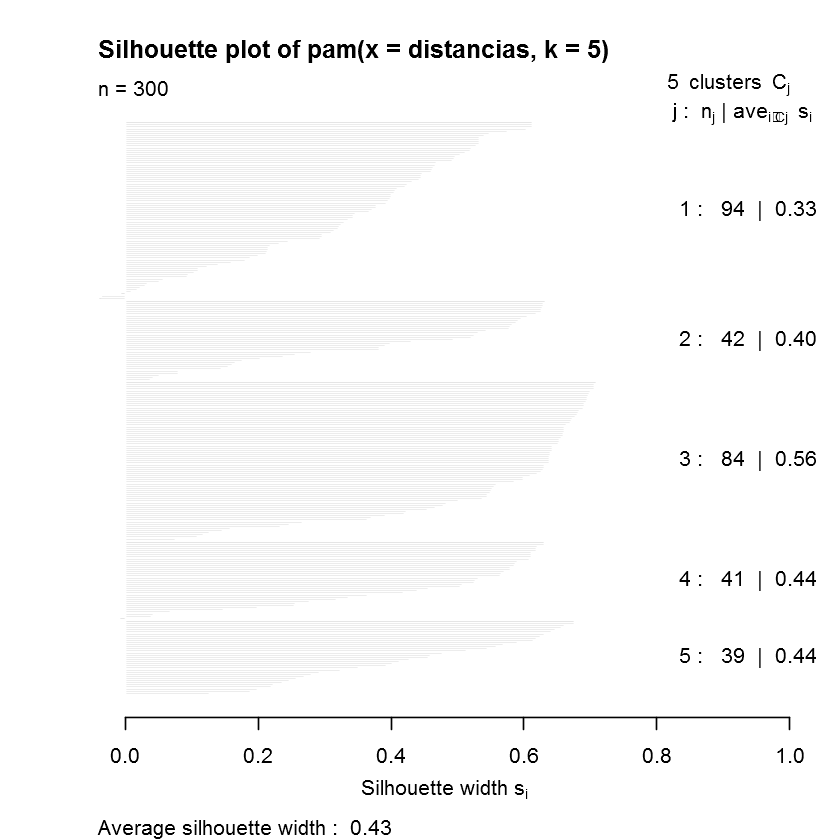

In [17]:
library(cluster)
distancias <- dist(dnum, method = "euclidian")
silueta <- pam(distancias, 5)
plot(silueta)

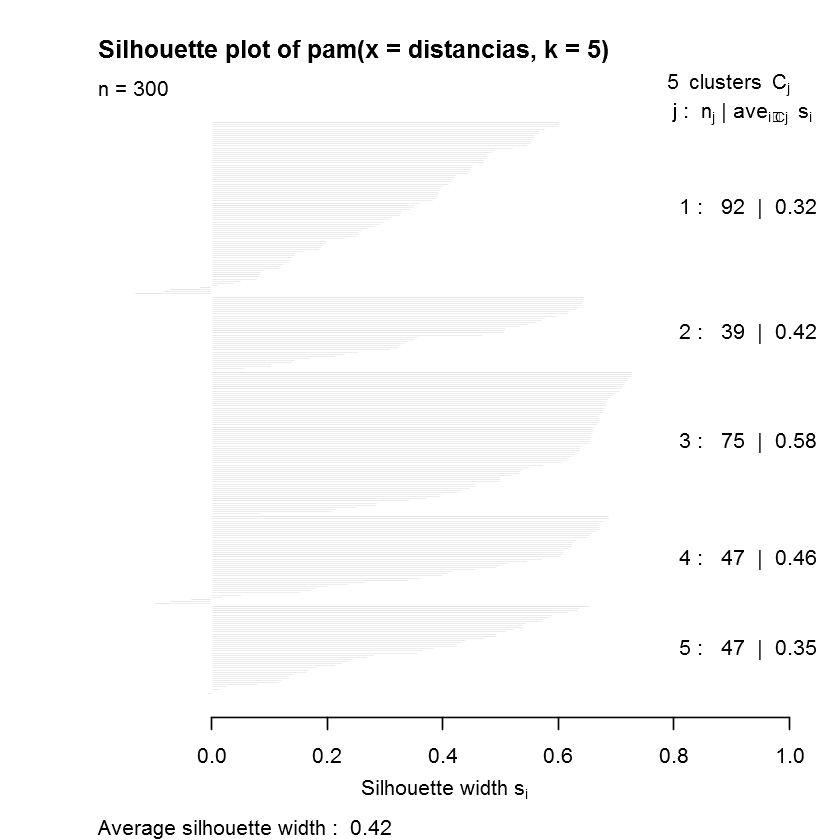

In [18]:
library(cluster)
distancias <- dist(dnum, method = "manhattan")
silueta <- pam(distancias, 5)
plot(silueta)

In [19]:
clust <- kmeans(dnum, 5)

In [20]:
# K-Means Cluster Analysis
fit <- kmeans(dnum, 5) # 5 cluster solution
# get cluster means 
aggregate(dnum,by=list(fit$cluster),FUN=mean)
# append cluster assignment
mydata <- data.frame(dnum, fit$cluster)

Group.1,Age,Income
1,0.8211029,0.3969900
2,0.1293400,0.1736619
3,0.5737477,0.5542716
4,0.4285714,0.2967479
5,0.8845083,0.7805526


Package 'mclust' version 5.4
Type 'citation("mclust")' for citing this R package in publications.


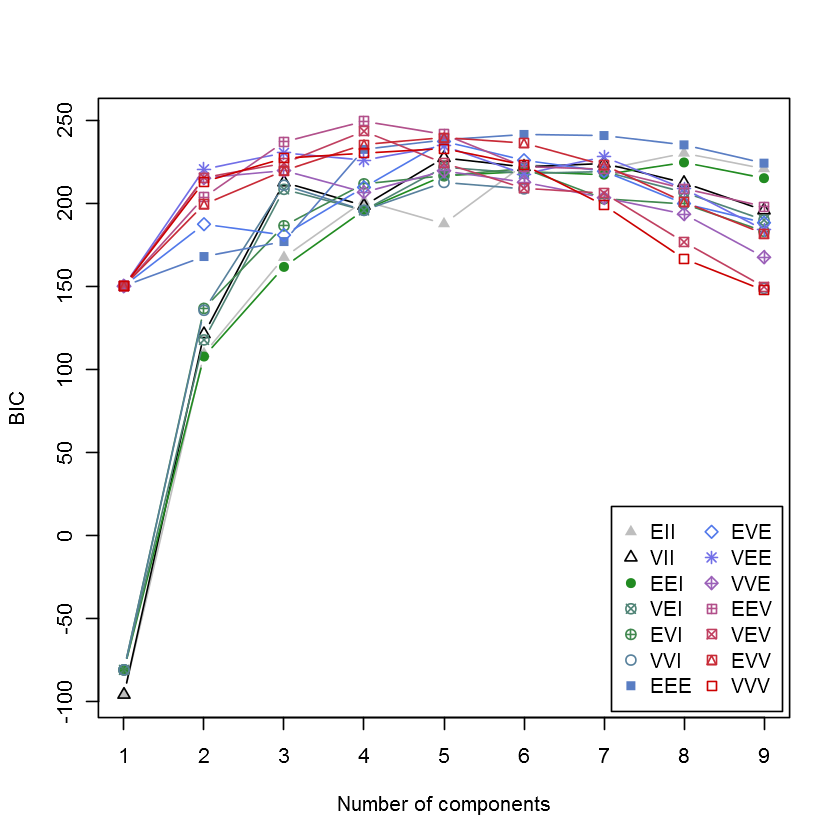

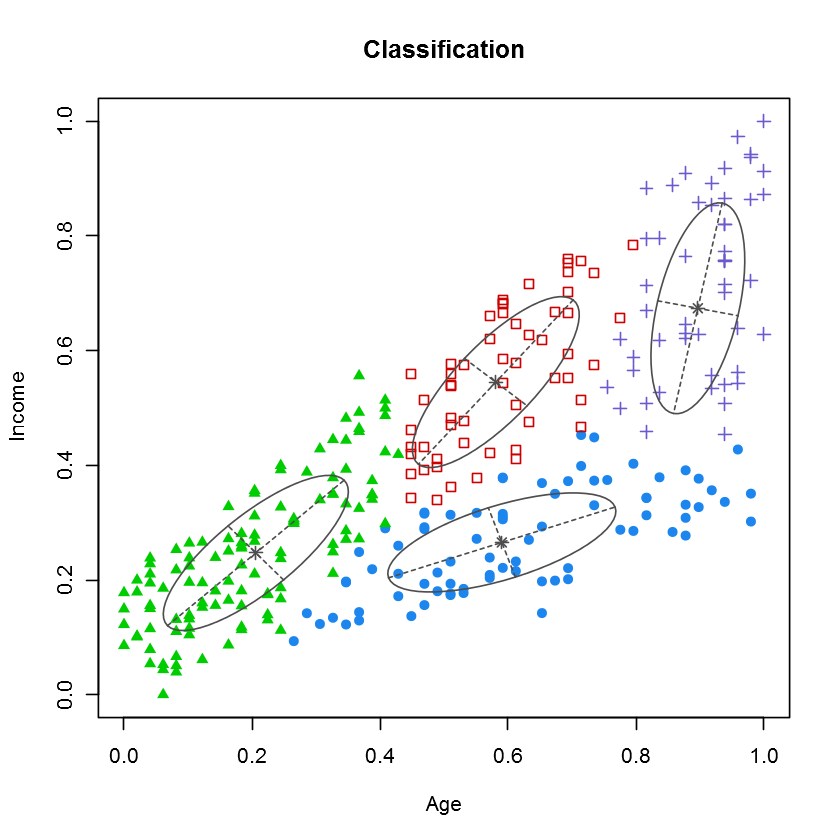

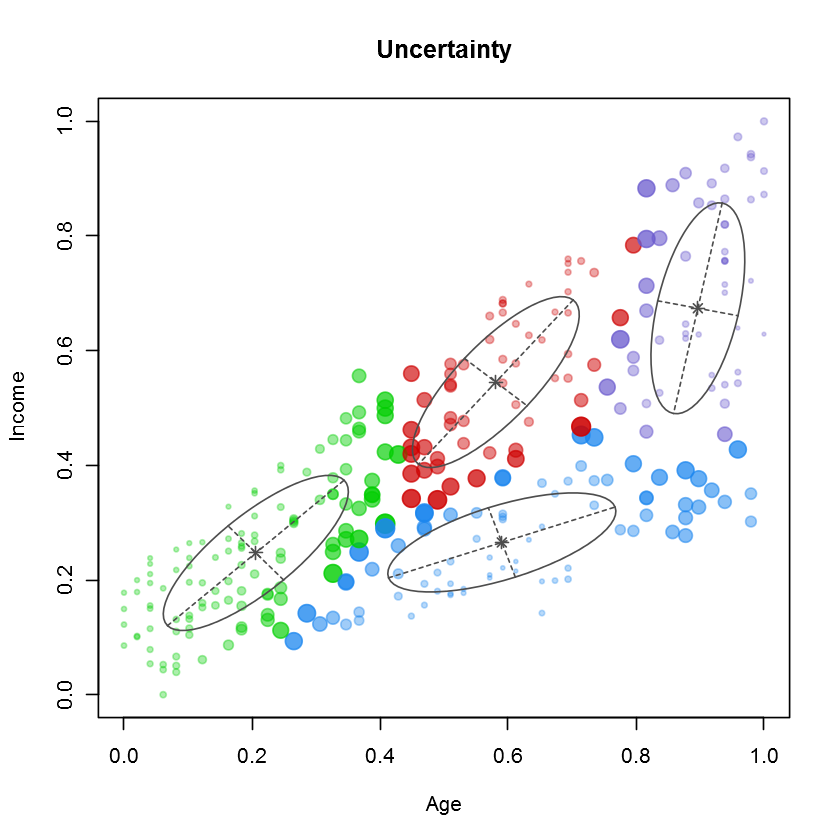

----------------------------------------------------
Gaussian finite mixture model fitted by EM algorithm 
----------------------------------------------------

Mclust EEV (ellipsoidal, equal volume and shape) model with 4 components:

 log.likelihood   n df      BIC      ICL
       173.1596 300 17 249.3549 147.7862

Clustering table:
  1   2   3   4 
 79  57 113  51 

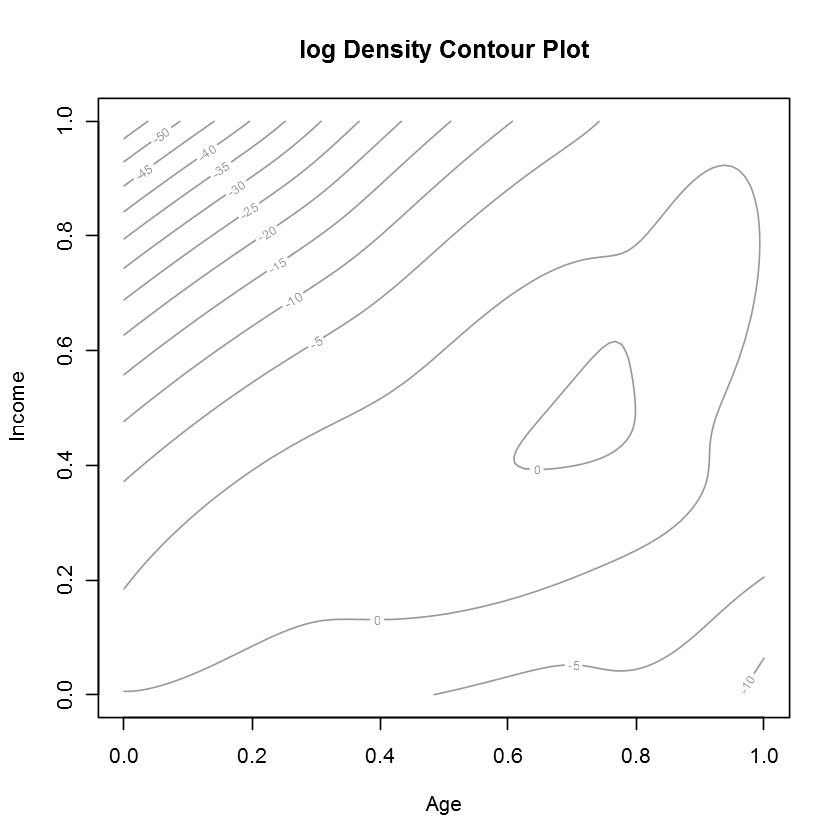

In [21]:
# Model Based Clustering
library(mclust)
fit <- Mclust(dnum)
plot(fit) # plot results 
summary(fit) # display the best model

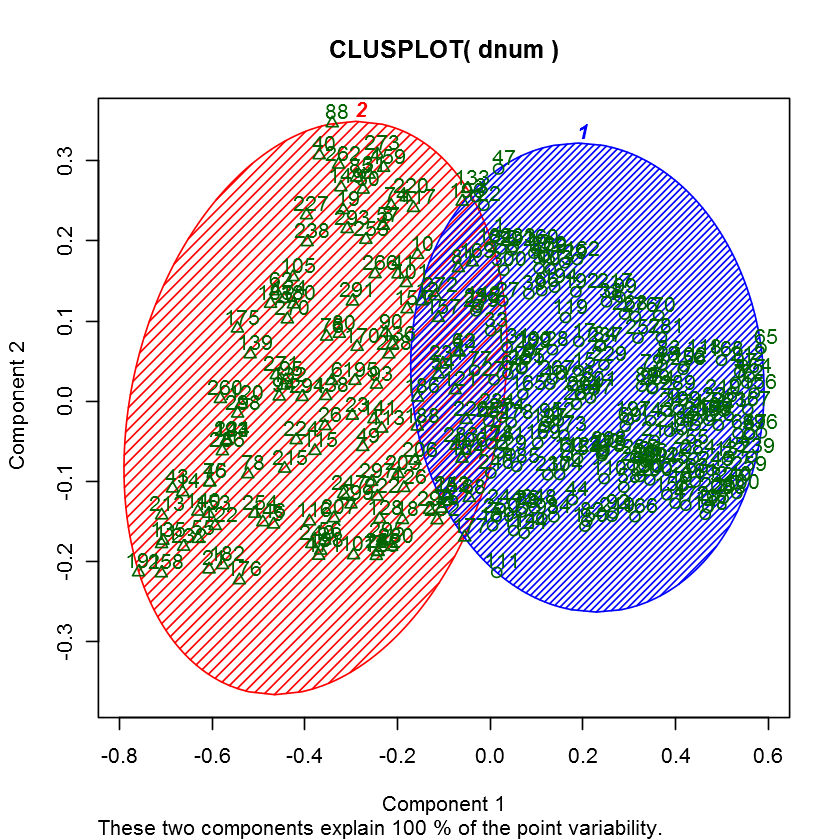

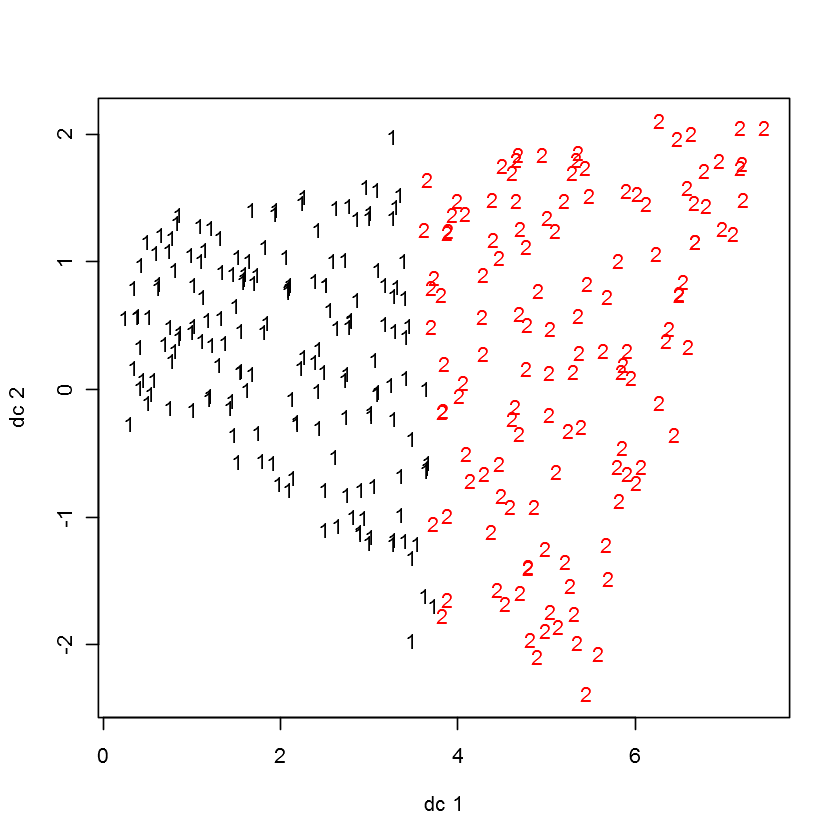

In [22]:
# K-Means Clustering with 5 clusters
fit <- kmeans(dnum, 2)

# Cluster Plot against 1st 2 principal components

# vary parameters for most readable graph
library(cluster) 
clusplot(dnum, fit$cluster, color=TRUE, shade=TRUE, 
  	labels=2, lines=0)

# Centroid Plot against 1st 2 discriminant functions
library(fpc)
plotcluster(dnum, fit$cluster)

In [23]:
data2 <- cbind(data, clasificacion = fit$cluster)
table(data2$clasificacion)


  1   2 
170 130 

In [100]:
write.csv(data2, file = 'clasificacion.csv')

In [24]:
data2_c1 <- data2[data2$clasificacion == 1,]
data2_c2 <- data2[data2$clasificacion == 2,]

In [25]:
summary(data2_c1)
summary(data2_c2)

      Age            Sex            Region       Income      Married  
 Min.   :18.00   FEMALE:79   INNER_CITY:83   Min.   : 5014   NO : 57  
 1st Qu.:25.00   MALE  :91   RURAL     :27   1st Qu.:14379   YES:113  
 Median :33.00               SUBURBAN  :12   Median :18510            
 Mean   :32.34               TOWN      :48   Mean   :19349            
 3rd Qu.:39.00                               3rd Qu.:23790            
 Max.   :51.00                               Max.   :37331            
 Children   car     Mortgage   Pep     clasificacion
 NO : 68   NO :86   NO :104   NO :99   Min.   :1    
 YES:102   YES:84   YES: 66   YES:71   1st Qu.:1    
                                       Median :1    
                                       Mean   :1    
                                       3rd Qu.:1    
                                       Max.   :1    

      Age            Sex            Region       Income      Married  Children
 Min.   :40.00   FEMALE:67   INNER_CITY:54   Min.   :16716   NO :41   NO :61  
 1st Qu.:50.00   MALE  :63   RURAL     :24   1st Qu.:29593   YES:89   YES:69  
 Median :57.00               SUBURBAN  :13   Median :37788                    
 Mean   :55.95               TOWN      :39   Mean   :38517                    
 3rd Qu.:63.00                               3rd Qu.:46556                    
 Max.   :67.00                               Max.   :63130                    
  car     Mortgage  Pep     clasificacion
 NO :67   NO :91   NO :63   Min.   :2    
 YES:63   YES:39   YES:67   1st Qu.:2    
                            Median :2    
                            Mean   :2    
                            3rd Qu.:2    
                            Max.   :2    

In [88]:
nom <- split(data2_c1, data2_c1$Region)
y <- c(names(nom))
y[2]

[1] "RURAL"

In [98]:
Region <- cbind(RURAL_C1 = data2_c1[data2_c1$Region == 'RURAL',], RURAL_C2 = data2_c2[data2_c2$Region == 'RURAL',])

ERROR: Error in data.frame(..., check.names = FALSE): arguments imply differing number of rows: 27, 24


In [47]:
round(prop.table(table(data2_c1$Region)*100), digits = 2)
round(prop.table(table(data2_c2$Region)*100), digits = 2)
length(data[data2_c1$Region == "TOWN",])


INNER_CITY      RURAL   SUBURBAN       TOWN 
      0.49       0.16       0.07       0.28 


INNER_CITY      RURAL   SUBURBAN       TOWN 
      0.42       0.18       0.10       0.30 

[1] 9

In [99]:
prom1 <- as.data.frame(round(prop.table(table(data2_c1$Region)*100), digits = 2))
prom2 <- as.data.frame(round(prop.table(table(data2_c2$Region)*100), digits = 2))
region <- cbind(prom1,prom2[2])
colnames(region)[2] <- "Cluster 1"
colnames(region)[3] <- "Cluster 2"
region

Var1,Cluster 1,Cluster 2
INNER_CITY,0.49,0.42
RURAL,0.16,0.18
SUBURBAN,0.07,0.10
TOWN,0.28,0.30


In [76]:
nom <- c(region[1])
nom[1]


$Var1
[1] INNER_CITY RURAL      SUBURBAN   TOWN      
Levels: INNER_CITY RURAL SUBURBAN TOWN

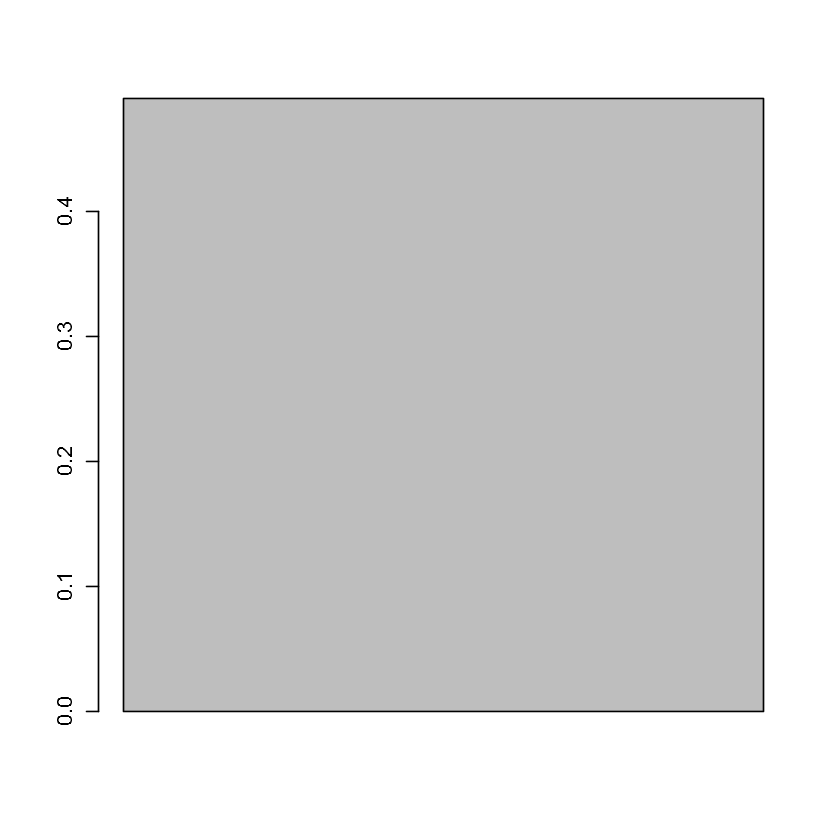

In [48]:
pr <- c(seq(from = 0, to = 0.49, length.out = 50))
barplot(pr[50])


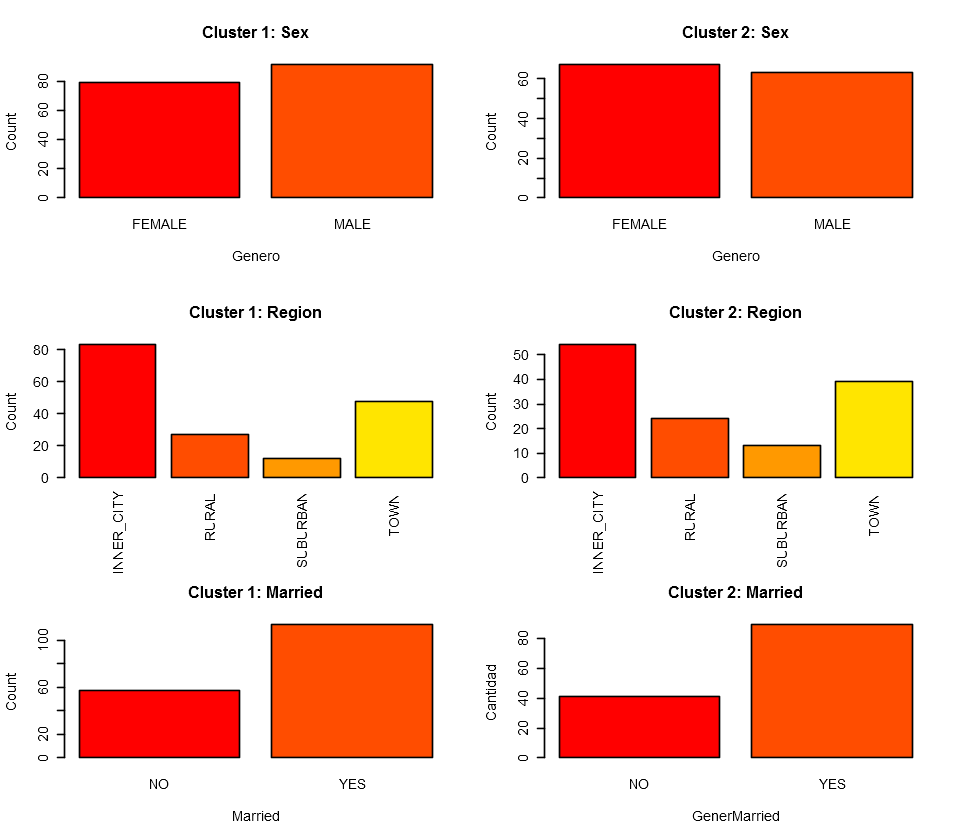

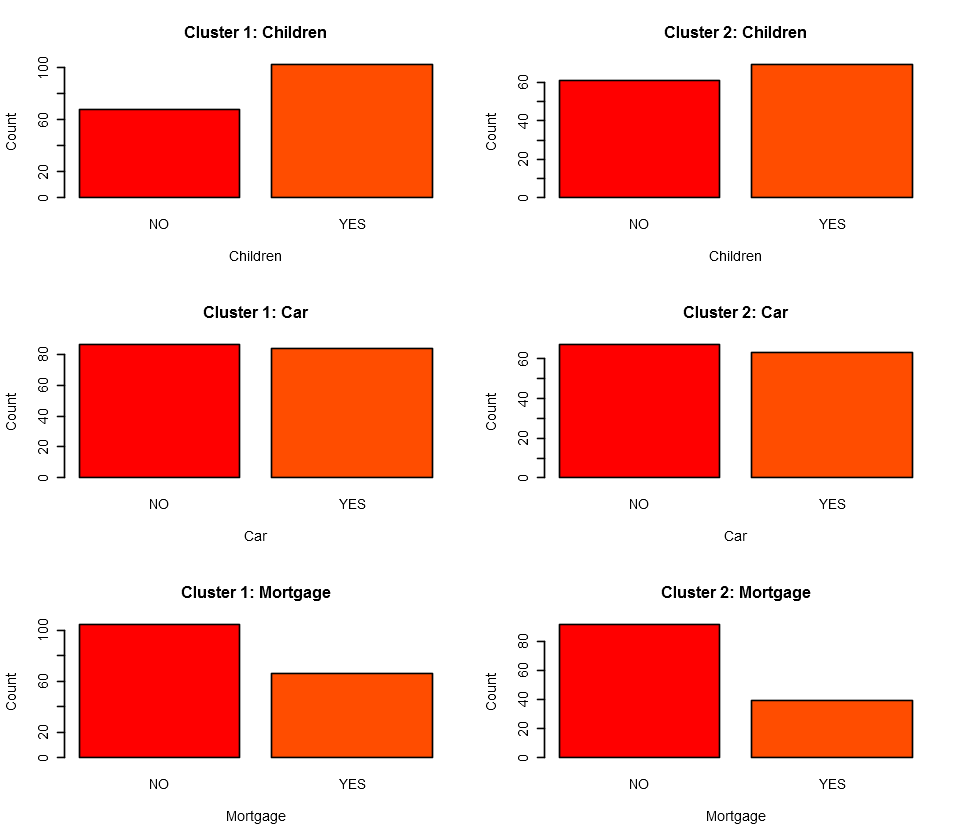

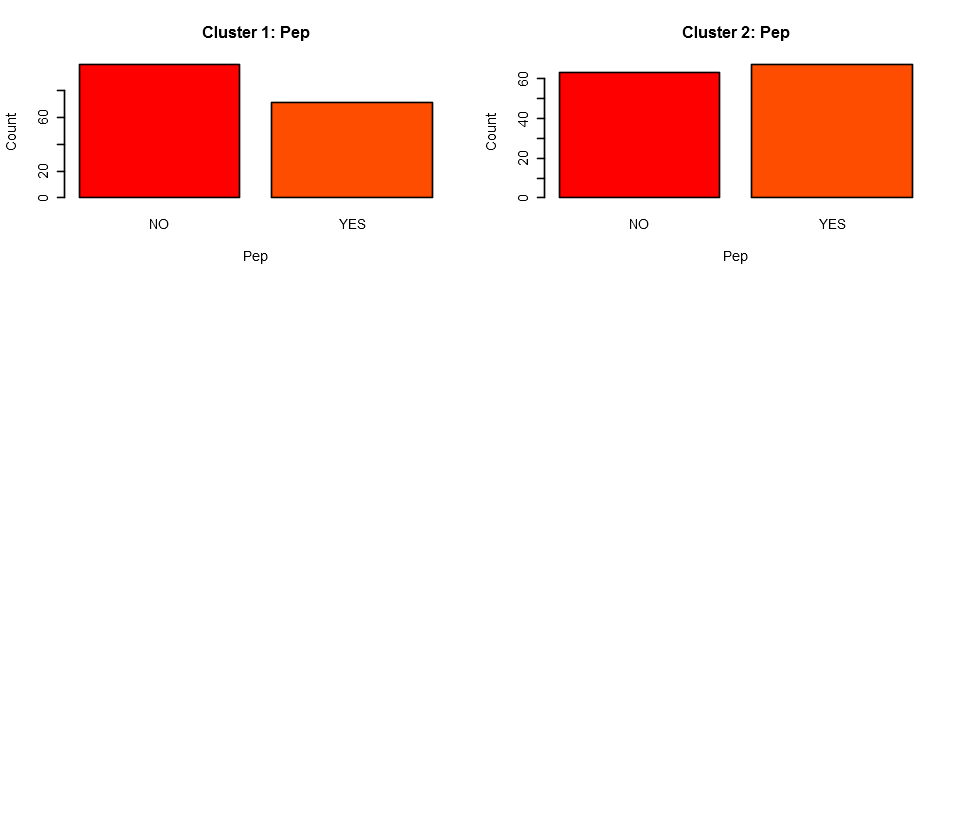

In [36]:
options(repr.plot.width = 8, repr.plot.heigth = 4)
par(mfrow = c(3,2))

plot(data2_c1$Sex,
     col = rainbow(20),
     main = "Cluster 1: Sex",
     xlab = "Genero",
     ylab = "Count")


plot(data2_c2$Sex,
     col = rainbow(20),
     main = "Cluster 2: Sex",
     ylab = "Count",
     xlab = "Genero")

plot(data2_c1$Region,
     col = rainbow(20),
     main = "Cluster 1: Region",
     ylab = "Count",
     las = 2)

plot(data2_c2$Region,
     col = rainbow(20),
     main = "Cluster 2: Region",
     ylab = "Count",
     las = 2)

plot(data2_c1$Married,
     col = rainbow(20),
     main = "Cluster 1: Married",
     xlab = "Married",
     ylab = "Count")


plot(data2_c2$Married,
     col = rainbow(20),
     main = "Cluster 2: Married",
     ylab = "Cantidad",
     xlab = "GenerMarried")

plot(data2_c1$Children,
     col = rainbow(20),
     main = "Cluster 1: Children",
     xlab = "Children",
     ylab = "Count")


plot(data2_c2$Children,
     col = rainbow(20),
     main = "Cluster 2: Children",
     ylab = "Count",
     xlab = "Children")

plot(data2_c1$car,
     col = rainbow(20),
     main = "Cluster 1: Car",
     xlab = "Car",
     ylab = "Count")


plot(data2_c2$car,
     col = rainbow(20),
     main = "Cluster 2: Car",
     ylab = "Count",
     xlab = "Car")


plot(data2_c1$Mortgage,
     col = rainbow(20),
     main = "Cluster 1: Mortgage",
     xlab = "Mortgage",
     ylab = "Count")


plot(data2_c2$Mortgage,
     col = rainbow(20),
     main = "Cluster 2: Mortgage",
     ylab = "Count",
     xlab = "Mortgage")

plot(data2_c1$Pep,
     col = rainbow(20),
     main = "Cluster 1: Pep",
     xlab = "Pep",
     ylab = "Count")


plot(data2_c2$Pep,
     col = rainbow(20),
     main = "Cluster 2: Pep",
     ylab = "Count",
     xlab = "Pep")


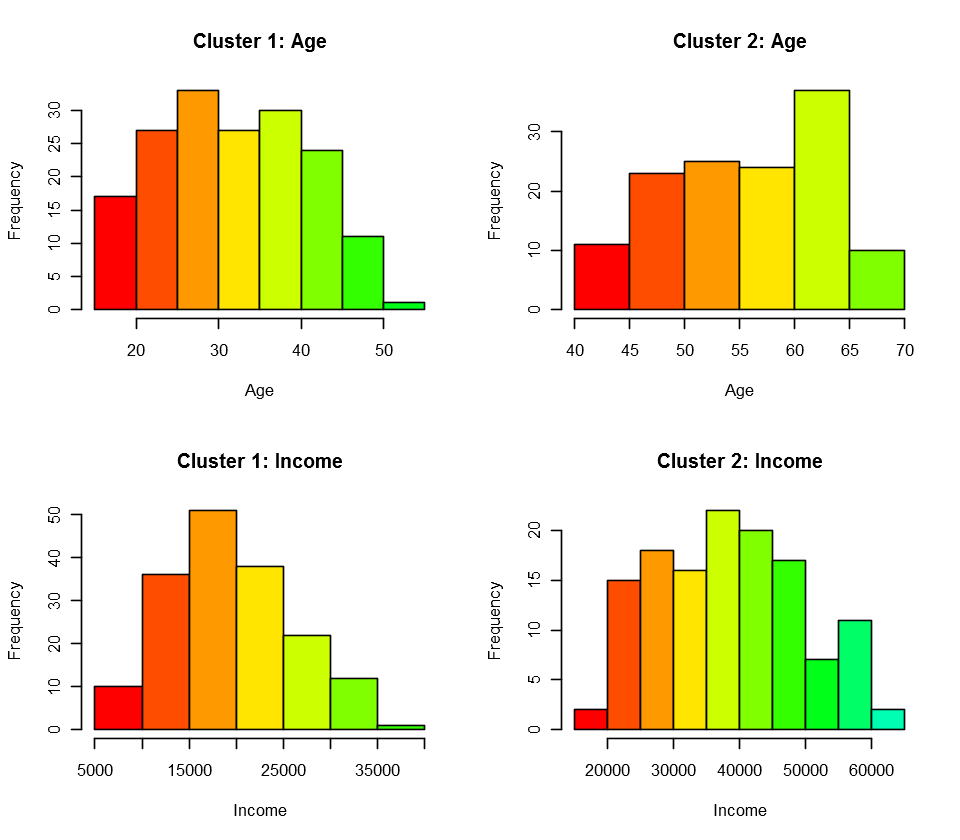

In [37]:
options(repr.plot.width = 8, repr.plot.heigth = 4)
par(mfrow = c(2,2))


hist(data2_c1$Age,
     col = rainbow(20),
     main = "Cluster 1: Age",
     xlab = "Age")

hist(data2_c2$Age,
     col = rainbow(20),
     main = "Cluster 2: Age",
     xlab = "Age")

hist(data2_c1$Income,
     col = rainbow(20),
     main = "Cluster 1: Income",
     xlab = "Income")

hist(data2_c2$Income,
     col = rainbow(20),
     main = "Cluster 2: Income",
     xlab = "Income")


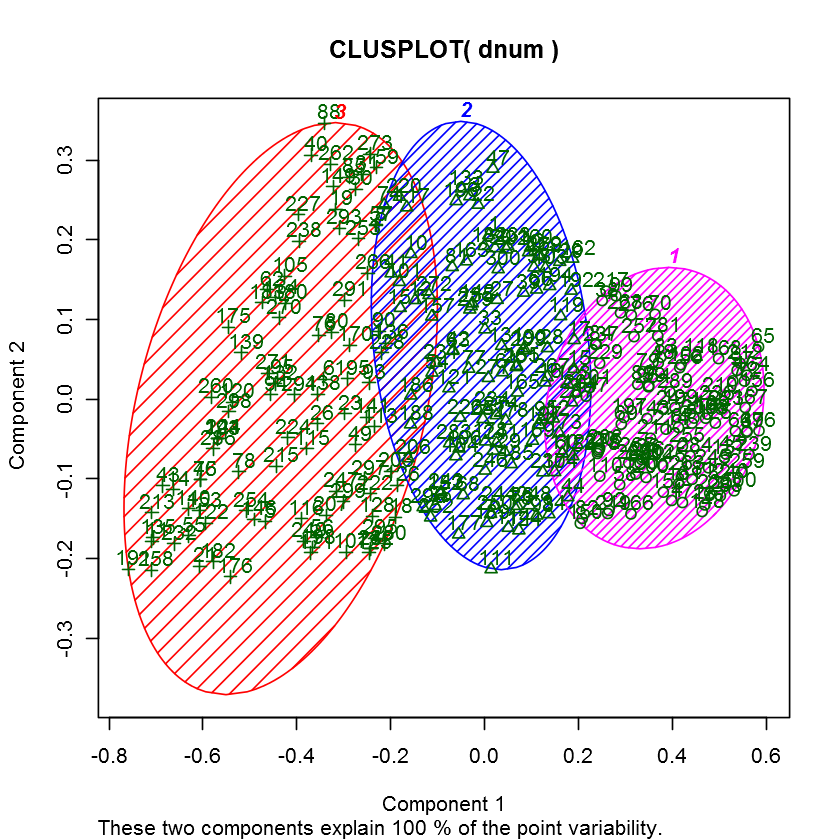

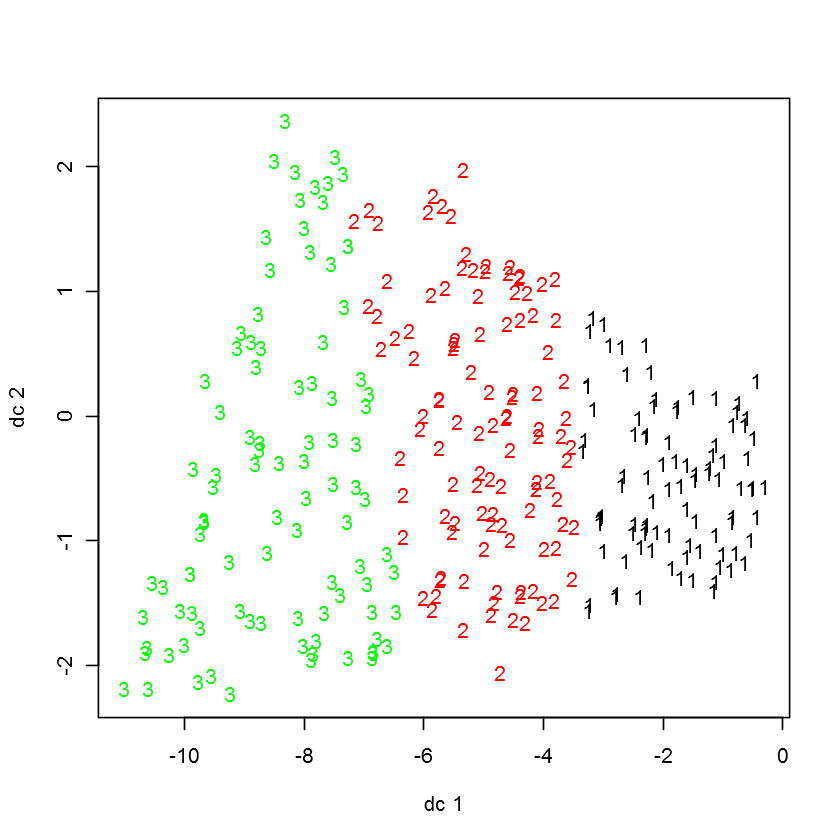

In [24]:

# K-Means Clustering with 5 clusters
fit <- kmeans(dnum, 3)

# Cluster Plot against 1st 2 principal components

# vary parameters for most readable graph
library(cluster) 
clusplot(dnum, fit$cluster, color=TRUE, shade=TRUE, 
  	labels=2, lines=0)

# Centroid Plot against 1st 2 discriminant functions
library(fpc)
plotcluster(dnum, fit$cluster)

In [25]:
attributes(fit)
fit$classification
length(fit$classification)
cbind(data, clasifacion = fit$classification)

$names
[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

$class
[1] "kmeans"

NULL

[1] 0

ERROR: Error in data.frame(..., check.names = FALSE): arguments imply differing number of rows: 300, 0


In [27]:
length(fit)

[1] 9

In [28]:
fit

K-means clustering with 3 clusters of sizes 93, 110, 97

Cluster means:
        Age    Income
1 0.1595348 0.1865273
2 0.5029685 0.3481948
3 0.8274774 0.6312177

Clustering vector:
  [1] 2 2 2 1 3 3 1 3 2 2 3 2 2 3 2 2 2 3 3 1 3 2 3 1 1 3 2 2 2 3 3 1 2 2 2 1 1
 [38] 1 2 3 2 2 3 2 1 3 2 1 3 2 1 2 2 2 3 3 3 1 1 2 2 3 2 1 1 2 1 2 1 1 1 1 2 2
 [75] 3 3 2 3 1 3 2 1 1 1 3 2 1 3 1 3 2 1 3 3 3 1 1 2 1 1 2 1 2 2 3 2 3 1 1 1 2
[112] 2 3 2 3 3 2 1 2 3 2 3 2 2 3 3 2 3 2 1 2 3 2 3 3 3 1 3 3 3 3 2 1 3 1 3 1 1
[149] 3 1 2 2 3 2 2 1 2 1 3 2 1 2 2 1 2 1 1 1 2 3 3 1 2 2 3 3 2 2 2 3 1 3 3 2 2
[186] 2 1 2 2 2 3 2 3 2 3 2 1 3 1 1 1 1 3 2 1 2 3 1 2 1 1 1 3 1 3 1 1 1 1 2 3 3
[223] 1 3 1 2 3 3 1 2 2 3 2 2 2 1 1 3 1 1 2 3 2 2 1 2 3 2 3 2 2 2 3 3 1 1 1 3 1
[260] 3 2 3 1 1 1 3 2 1 2 3 3 2 3 2 1 1 2 2 2 3 1 3 2 1 1 3 2 1 1 1 3 2 3 3 3 2
[297] 3 3 3 2

Within cluster sum of squares by cluster:
[1] 1.562862 2.998684 4.611637
 (between_SS / total_SS =  77.1 %)

Available components:

[1] "cluster"      "centers"     

In [30]:
length(fit$cluster)

[1] 300

In [31]:
fit$cluster

[1] 2 2 2 1 3 3 1 3 2 2 3 2 2 3 2 2 2 3 3 1 3 2 3 1 1 3 2 2 2 3 3 1 2 2 2 1 1
 [38] 1 2 3 2 2 3 2 1 3 2 1 3 2 1 2 2 2 3 3 3 1 1 2 2 3 2 1 1 2 1 2 1 1 1 1 2 2
 [75] 3 3 2 3 1 3 2 1 1 1 3 2 1 3 1 3 2 1 3 3 3 1 1 2 1 1 2 1 2 2 3 2 3 1 1 1 2
[112] 2 3 2 3 3 2 1 2 3 2 3 2 2 3 3 2 3 2 1 2 3 2 3 3 3 1 3 3 3 3 2 1 3 1 3 1 1
[149] 3 1 2 2 3 2 2 1 2 1 3 2 1 2 2 1 2 1 1 1 2 3 3 1 2 2 3 3 2 2 2 3 1 3 3 2 2
[186] 2 1 2 2 2 3 2 3 2 3 2 1 3 1 1 1 1 3 2 1 2 3 1 2 1 1 1 3 1 3 1 1 1 1 2 3 3
[223] 1 3 1 2 3 3 1 2 2 3 2 2 2 1 1 3 1 1 2 3 2 2 1 2 3 2 3 2 2 2 3 3 1 1 1 3 1
[260] 3 2 3 1 1 1 3 2 1 2 3 3 2 3 2 1 1 2 2 2 3 1 3 2 1 1 3 2 1 1 1 3 2 3 3 3 2
[297] 3 3 3 2

In [38]:
data<- cbind(data, clasificacion= fit$cluster)

In [39]:
head(data)

Age,Sex,Region,Income,Married,Children,car,Mortgage,Pep,clasifcacion,clasificacion
48,FEMALE,INNER_CITY,17546.0,NO,YES,NO,NO,YES,2,2
40,MALE,TOWN,30085.1,YES,YES,YES,YES,NO,2,2
51,FEMALE,INNER_CITY,16575.4,YES,NO,YES,NO,NO,2,2
23,FEMALE,TOWN,20375.4,YES,YES,NO,NO,NO,1,1
57,FEMALE,RURAL,50576.3,YES,NO,NO,NO,NO,3,3
57,FEMALE,TOWN,37869.6,YES,YES,NO,NO,YES,3,3


In [52]:
data_1 <- data[data$clasificacion== 1,]
data_2 <- data[data$clasificacion== 2,]
data_3 <- data[data$clasificacion== 3,]

In [53]:
head(data_1)

,Age,Sex,Region,Income,Married,Children,car,Mortgage,Pep,clasificacion
4,23,FEMALE,TOWN,20375.40,YES,YES,NO,NO,NO,1
7,22,MALE,RURAL,8877.07,NO,NO,NO,NO,YES,1
20,31,MALE,TOWN,22522.80,YES,NO,YES,NO,NO,1
24,27,FEMALE,TOWN,15538.80,NO,NO,YES,YES,NO,1
25,22,MALE,INNER_CITY,12640.30,NO,YES,YES,NO,NO,1
32,20,FEMALE,TOWN,16325.80,YES,YES,NO,NO,NO,1


In [55]:
summary(data_1)
summary(data_2)
summary(data_3)

      Age            Sex            Region       Income      Married  Children
 Min.   :18.00   FEMALE:44   INNER_CITY:48   Min.   : 5014   NO :35   NO :33  
 1st Qu.:22.00   MALE  :49   RURAL     :17   1st Qu.:12178   YES:58   YES:60  
 Median :26.00               SUBURBAN  : 8   Median :15525                    
 Mean   :25.82               TOWN      :20   Mean   :15854                    
 3rd Qu.:30.00                               3rd Qu.:19481                    
 Max.   :36.00                               Max.   :28240                    
  car     Mortgage  Pep     clasificacion
 NO :51   NO :60   NO :59   Min.   :1    
 YES:42   YES:33   YES:34   1st Qu.:1    
                            Median :1    
                            Mean   :1    
                            3rd Qu.:1    
                            Max.   :1    

      Age            Sex            Region       Income      Married  Children
 Min.   :32.00   FEMALE:47   INNER_CITY:43   Min.   :12977   NO :34   NO :51  
 1st Qu.:38.00   MALE  :63   RURAL     :16   1st Qu.:20720   YES:76   YES:59  
 Median :42.00               SUBURBAN  : 8   Median :25281                    
 Mean   :42.65               TOWN      :43   Mean   :25250                    
 3rd Qu.:47.00                               3rd Qu.:29890                    
 Max.   :58.00                               Max.   :38540                    
  car     Mortgage  Pep     clasificacion
 NO :54   NO :63   NO :61   Min.   :2    
 YES:56   YES:47   YES:49   1st Qu.:2    
                            Median :2    
                            Mean   :2    
                            3rd Qu.:2    
                            Max.   :2    

      Age            Sex            Region       Income      Married  Children
 Min.   :46.00   FEMALE:55   INNER_CITY:46   Min.   :21140   NO :29   NO :45  
 1st Qu.:53.00   MALE  :42   RURAL     :18   1st Qu.:34867   YES:68   YES:52  
 Median :60.00               SUBURBAN  : 9   Median :41610                    
 Mean   :58.55               TOWN      :24   Mean   :41698                    
 3rd Qu.:64.00                               3rd Qu.:48975                    
 Max.   :67.00                               Max.   :63130                    
  car     Mortgage  Pep     clasificacion
 NO :48   NO :72   NO :42   Min.   :3    
 YES:49   YES:25   YES:55   1st Qu.:3    
                            Median :3    
                            Mean   :3    
                            3rd Qu.:3    
                            Max.   :3    

In [56]:
library(Cairo)
library(ggplot2)
library(grid)


  1   2   3 
 93 110  97 

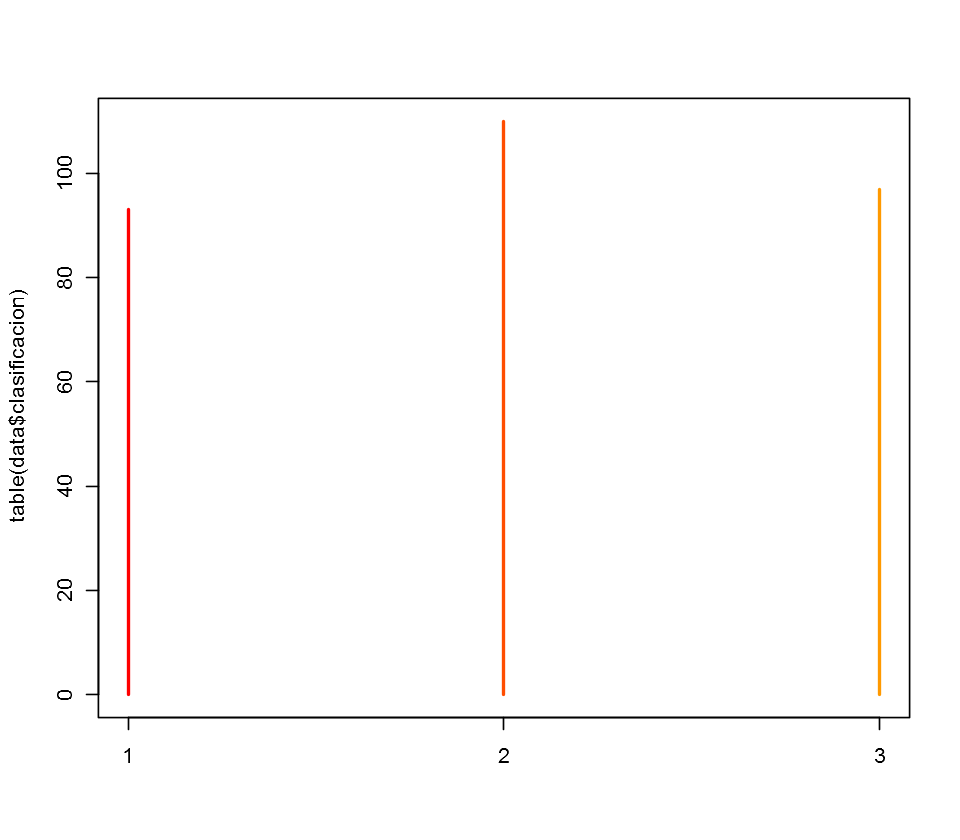

In [109]:
table(data$clasificacion)
plot(table(data$clasificacion),
     col = rainbow(20))

In [61]:
ggplot(data_1$Income)

ERROR: Error: ggplot2 doesn't know how to deal with data of class numeric


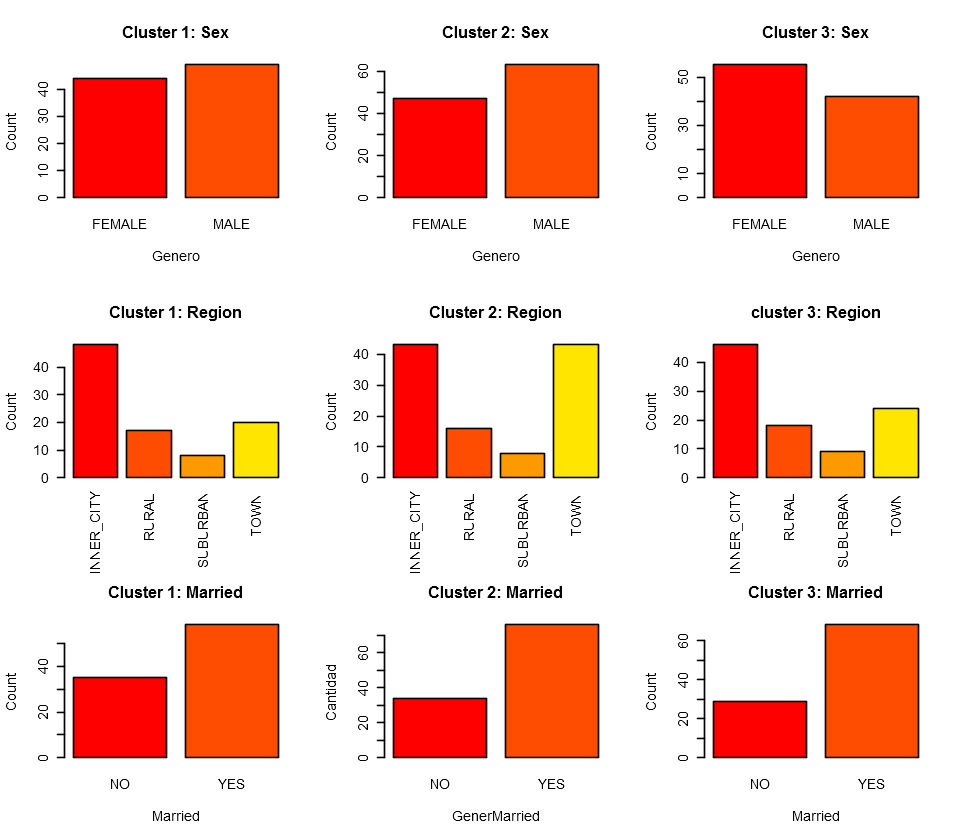

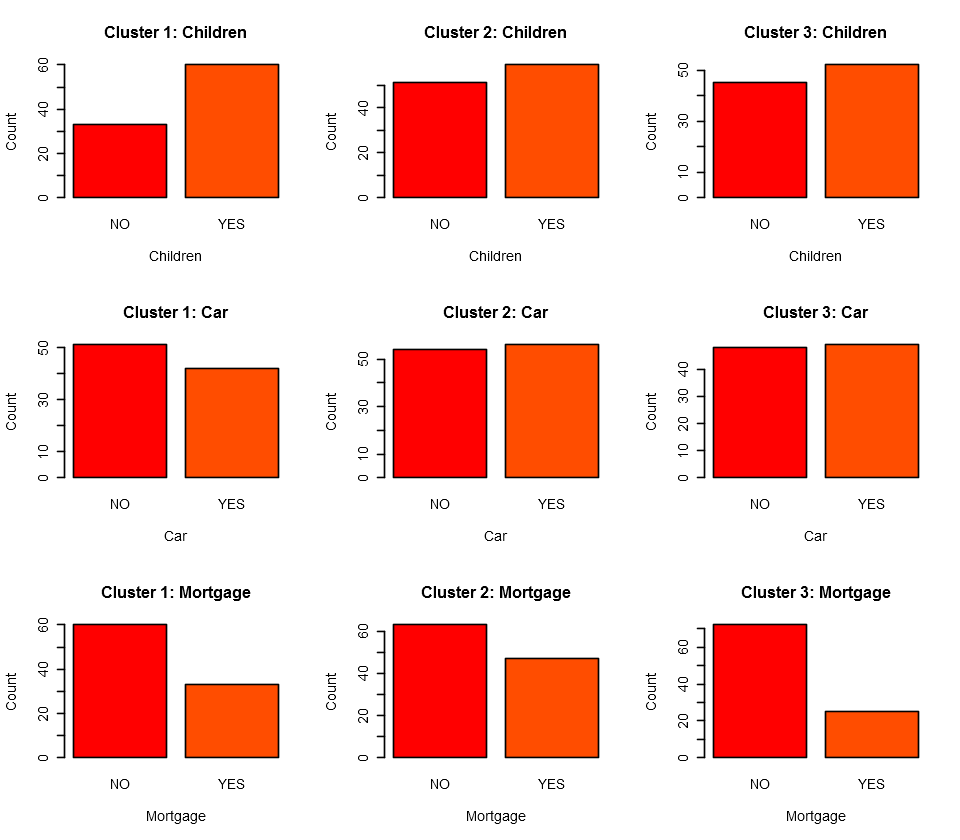

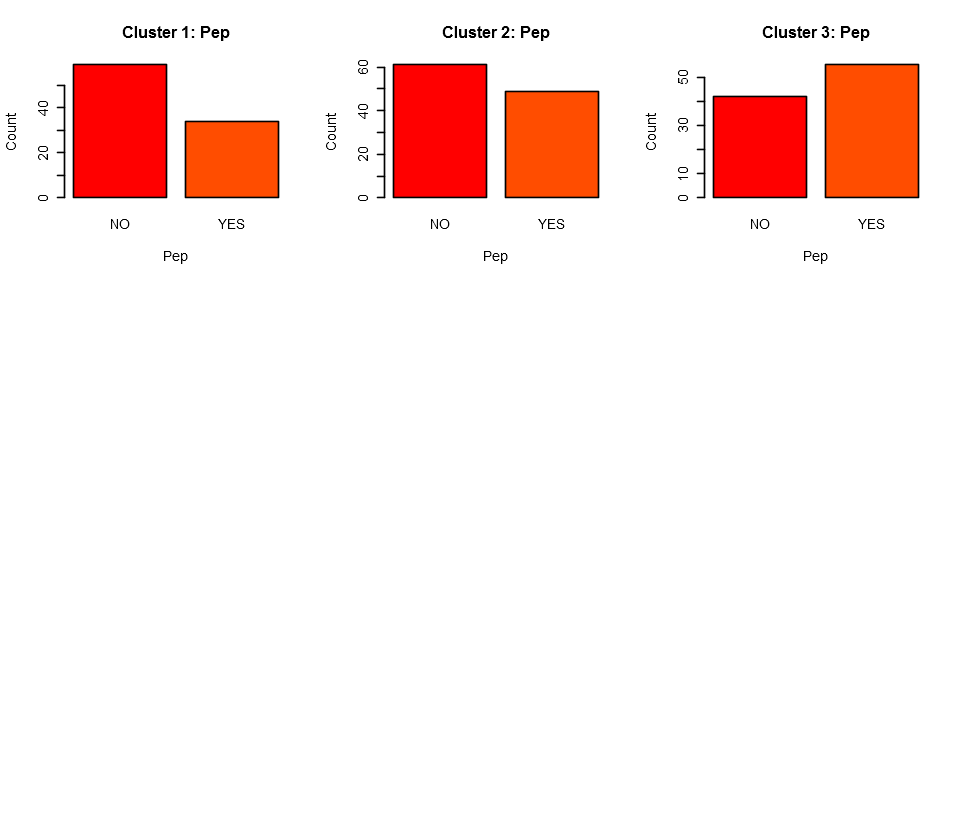

In [102]:
options(repr.plot.width = 8, repr.plot.heigth = 4)
par(mfrow = c(3,3))

plot(data_1$Sex,
     col = rainbow(20),
     main = "Cluster 1: Sex",
     xlab = "Genero",
     ylab = "Count")


plot(data_2$Sex,
     col = rainbow(20),
     main = "Cluster 2: Sex",
     ylab = "Count",
     xlab = "Genero")

plot(data_3$Sex,
     col = rainbow(20),
     main = "Cluster 3: Sex",
     xlab = "Genero",
     ylab = "Count")


plot(data_1$Region,
     col = rainbow(20),
     main = "Cluster 1: Region",
     ylab = "Count",
     las = 2)

plot(data_2$Region,
     col = rainbow(20),
     main = "Cluster 2: Region",
     ylab = "Count",
     las = 2)

plot(data_3$Region,
     col = rainbow(20),
     main = "cluster 3: Region",
     ylab = "Count",
     las = 2)

plot(data_1$Married,
     col = rainbow(20),
     main = "Cluster 1: Married",
     xlab = "Married",
     ylab = "Count")


plot(data_2$Married,
     col = rainbow(20),
     main = "Cluster 2: Married",
     ylab = "Cantidad",
     xlab = "GenerMarried")

plot(data_3$Married,
     col = rainbow(20),
     main = "Cluster 3: Married",
     xlab = "Married",
     ylab = "Count")

plot(data_1$Children,
     col = rainbow(20),
     main = "Cluster 1: Children",
     xlab = "Children",
     ylab = "Count")


plot(data_2$Children,
     col = rainbow(20),
     main = "Cluster 2: Children",
     ylab = "Count",
     xlab = "Children")

plot(data_3$Children,
     col = rainbow(20),
     main = "Cluster 3: Children",
     xlab = "Children",
     ylab = "Count")

plot(data_1$car,
     col = rainbow(20),
     main = "Cluster 1: Car",
     xlab = "Car",
     ylab = "Count")


plot(data_2$car,
     col = rainbow(20),
     main = "Cluster 2: Car",
     ylab = "Count",
     xlab = "Car")

plot(data_3$car,
     col = rainbow(20),
     main = "Cluster 3: Car",
     xlab = "Car",
     ylab = "Count")



plot(data_1$Mortgage,
     col = rainbow(20),
     main = "Cluster 1: Mortgage",
     xlab = "Mortgage",
     ylab = "Count")


plot(data_2$Mortgage,
     col = rainbow(20),
     main = "Cluster 2: Mortgage",
     ylab = "Count",
     xlab = "Mortgage")

plot(data_3$Mortgage,
     col = rainbow(20),
     main = "Cluster 3: Mortgage",
     xlab = "Mortgage",
     ylab = "Count")

plot(data_1$Pep,
     col = rainbow(20),
     main = "Cluster 1: Pep",
     xlab = "Pep",
     ylab = "Count")


plot(data_2$Pep,
     col = rainbow(20),
     main = "Cluster 2: Pep",
     ylab = "Count",
     xlab = "Pep")

plot(data_3$Pep,
     col = rainbow(20),
     main = "Cluster 3: Pep",
     xlab = "Pep",
     ylab = "Count")

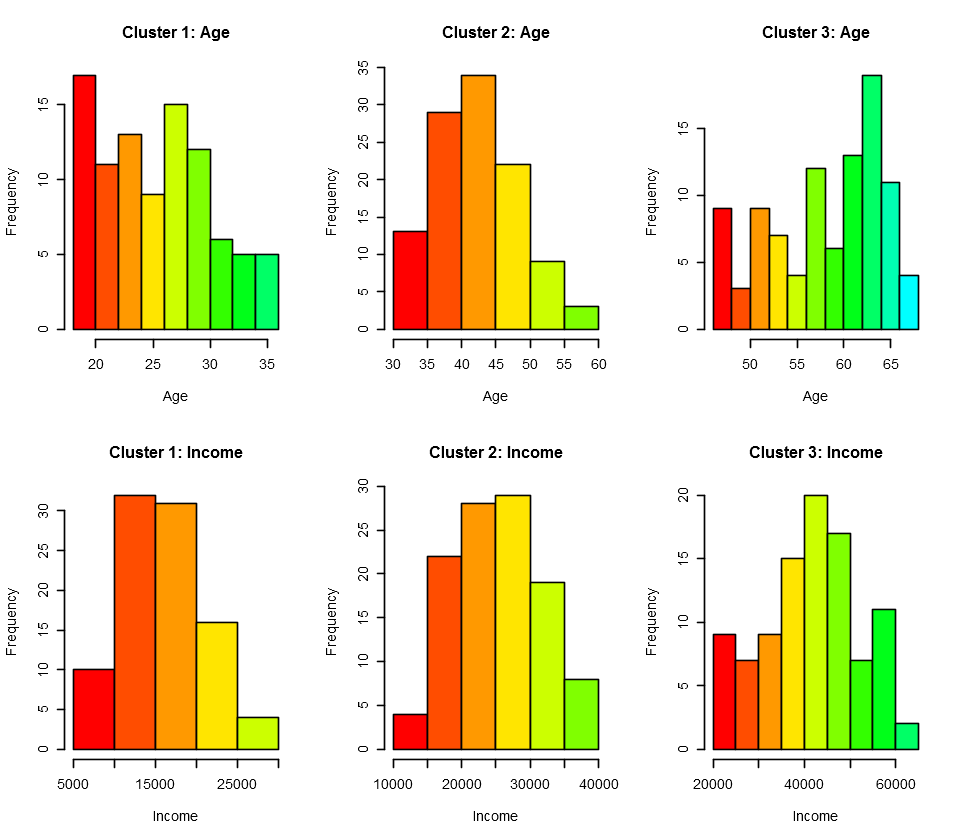

In [106]:
options(repr.plot.width = 8, repr.plot.heigth = 4)
par(mfrow = c(2,3))


hist(data_1$Age,
     col = rainbow(20),
     main = "Cluster 1: Age",
     xlab = "Age")

hist(data_2$Age,
     col = rainbow(20),
     main = "Cluster 2: Age",
     xlab = "Age")

hist(data_3$Age,
     col = rainbow(20),
     main = "Cluster 3: Age",
     xlab = "Age")

hist(data_1$Income,
     col = rainbow(20),
     main = "Cluster 1: Income",
     xlab = "Income")

hist(data_2$Income,
     col = rainbow(20),
     main = "Cluster 2: Income",
     xlab = "Income")

hist(data_3$Income,
     col = rainbow(20),
     main = "Cluster 3: Income",
     xlab = "Income")